In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
#%matplotlib notebook
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# About Dataset
1. User_ID:	User ID
2. Product_ID:	Product ID
3. Gender:	Sex of User
4. Age:	Age in bins
5. Occupation:	Occupation(Masked)
6. City_Category:	Category of the City (A,B,C)
7. StayInCurrentCityYears:	Number of years stay in current city
8. Marital_Status:	Marital Status
9. ProductCategory:	Product Category (Masked)
10. Purchase:	Purchase Amount

In [2]:
data = pd.read_csv('walmart_data.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Shape of Data

In [4]:
data.shape

(550068, 10)

# Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Null Check

In [6]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Relationship between Purchase made by Male User and Female Users

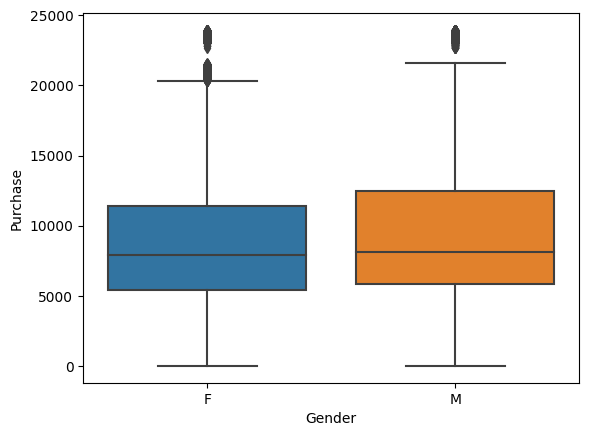

In [9]:
sns.boxplot(x='Gender',y='Purchase',data=data)
plt.show()

# Observation
1. Male users spend more than female users.
2. Average spend for male users is more than female users.

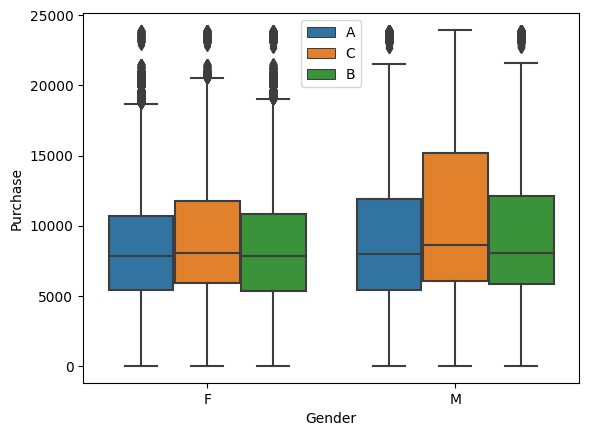

In [10]:
sns.boxplot(x='Gender',y='Purchase',data=data,hue='City_Category')
plt.legend(loc='upper center')
plt.show()

# From above observation we can see below insights for Female Users
1. Female users spends equal amount which belongs to city A and city B.
2. Female users from city C spends more than other city female users.


# From above observation we can see below insights for Male Users
1. Male user from City C spends more than city A and city B.
2. Male user from city B spends more than city A.

# Suggestion
1. Provide some discount on product to female users from city A and city B.
2. Provide some discount/good offers to male users from city A and city B.

In [11]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


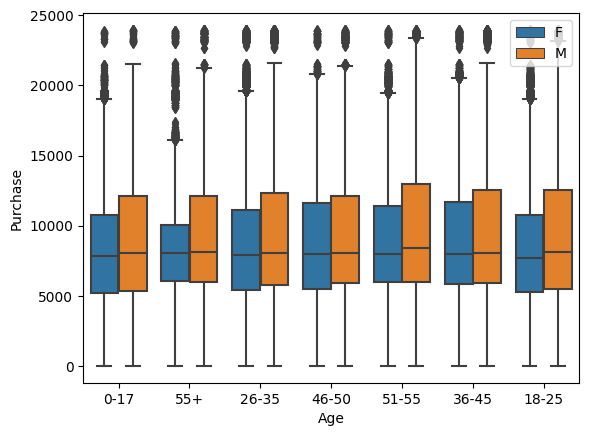

In [12]:
sns.boxplot(data=data,x='Age',y='Purchase',hue='Gender')
plt.legend(loc='upper right')
plt.show()

# Observation
1. No major difference in average purchase from users who are 55+ age group.
2. It is observed that male users from age group 51-55 has average purchase more than female users.
3. It is observed that male users from age group 18-25 has average purchase more than female users.

# Male Spending Habits

In [13]:
def get_sample_means(df,sample_length,population_size):
    sample_length = sample_length
    population_size = population_size
    means_list = []
    for sample in tqdm(range(population_size)):
        population_sample = np.random.choice(df,size=sample_length)
        population_sample_mean = round(population_sample.mean(),2)
        means_list.append(population_sample_mean)
    means_list = np.array(means_list)
    return means_list


def get_confidence_range(means_array):
    means_two_point_fifth = round(np.percentile(means_array,2.5),2)
    means_ninty_seven_point_fifth = round(np.percentile(means_array,97.5),2)
    return [means_two_point_fifth,means_ninty_seven_point_fifth]
    

In [14]:
male_purchase_data = data.loc[data['Gender']=='M']
male_purchase_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [15]:
male_purchase_data_population_mean = round(male_purchase_data['Purchase'].mean(),2)
male_purchase_data_population_std = round(male_purchase_data['Purchase'].std(),2)
print(f"Population mean: {male_purchase_data_population_mean}")

Population mean: 9437.53


In [16]:
male_amt_spending_population = male_purchase_data['Purchase']

In [17]:
print(f'Population length : {len(male_amt_spending_population)}')

Population length : 414259


In [18]:
sample_length = 1000
population_size=414000
male_amt_spending_means = get_sample_means(male_amt_spending_population,sample_length,population_size)

100%|███████████████████████████████████████████████████████████████████████| 414000/414000 [00:24<00:00, 16801.19it/s]


In [19]:
sample_mean = round(male_amt_spending_means.mean(),2)
print(f'mean_male_amt_spending : {sample_mean}')

mean_male_amt_spending : 9437.99


In [20]:
male_amt_means_twopointfifth,male_amt_means_nintysevenpointfifth = get_confidence_range(male_amt_spending_means)
print(f'Confidence interval of male user purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

Confidence interval of male user purchase :[9123.99,9753.7]


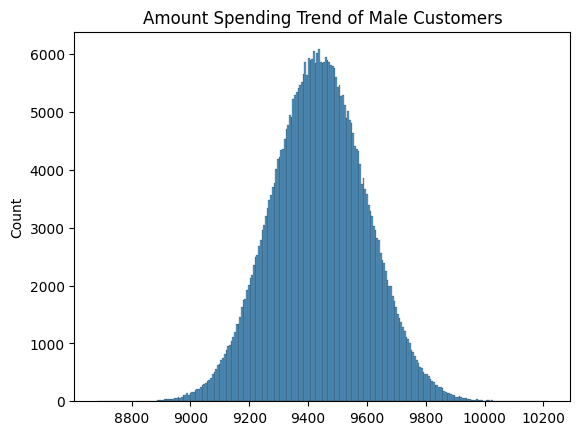

Confidence interval of male user purchase :[9123.99,9753.7]


In [21]:
plt.title('Amount Spending Trend of Male Customers')
sns.histplot(male_amt_spending_means)
plt.show()
print(f'Confidence interval of male user purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

# Female Spending Habits

In [22]:
female_purchase_data = data.loc[data['Gender']=='F']
female_purchase_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [23]:
female_purchase_data_population_mean = round(female_purchase_data['Purchase'].mean(),2)
print(f"Population mean: {female_purchase_data_population_mean}")

Population mean: 8734.57


In [24]:
female_amt_spending_population = female_purchase_data['Purchase']

In [25]:
print(f'Population length : {len(female_amt_spending_population)}')

Population length : 135809


In [26]:
sample_length = 1000
population_size=135000
female_amt_spending_means = get_sample_means(female_amt_spending_population,sample_length,population_size)

100%|███████████████████████████████████████████████████████████████████████| 135000/135000 [00:08<00:00, 15637.73it/s]


In [27]:
sample_mean = round(female_amt_spending_means.mean(),2)
print(f'mean_female_amt_spending : {sample_mean}')

mean_female_amt_spending : 8734.61


In [28]:
female_amt_means_twopointfifth,female_amt_means_nintysevenpointfifth = get_confidence_range(female_amt_spending_means)
print(f'Confidence interval of female user purchase :[{female_amt_means_twopointfifth},{female_amt_means_nintysevenpointfifth}]')

Confidence interval of female user purchase :[8439.97,9031.23]


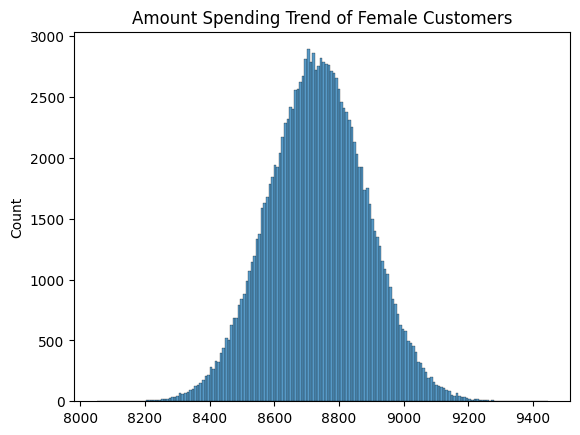

In [29]:
plt.title('Amount Spending Trend of Female Customers')
sns.histplot(female_amt_spending_means)
plt.show()

# Are women spending more money per transaction than men? Why or Why not?

In [30]:
male_purchase_data_population_mean = round(male_purchase_data['Purchase'].mean(),2)
female_purchase_data_population_mean = round(female_purchase_data['Purchase'].mean(),2)
print(f"Average male spending: {male_purchase_data_population_mean}")
print(f"Average female spending: {female_purchase_data_population_mean}")

Average male spending: 9437.53
Average female spending: 8734.57


# Observation
From above calculation we can observe that average spending by male customers is higher than average spending by female customers.

# Confidence intervals and distribution of the mean of the expenses by female and male customers

# Here we are checking for 95% Confidence of purchase for Users

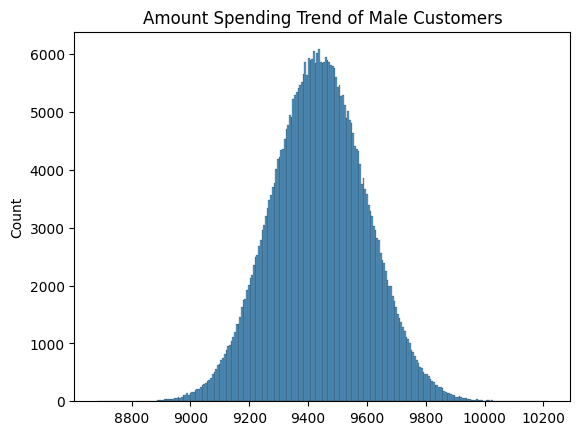

Confidence interval of male customer purchase :[9123.99,9753.7]


In [31]:
male_amt_means_twopointfifth = round(np.percentile(male_amt_spending_means,2.5),2)
male_amt_means_nintysevenpointfifth = round(np.percentile(male_amt_spending_means,97.5),2)
plt.title('Amount Spending Trend of Male Customers')
sns.histplot(male_amt_spending_means)
plt.show()
print(f'Confidence interval of male customer purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

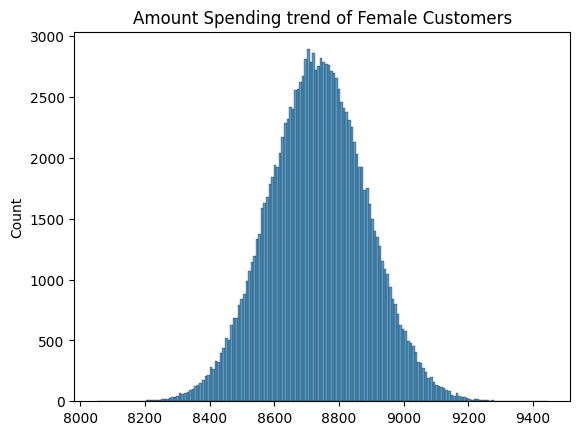

Confidence interval of female customer purchase :[8439.97,9031.23]


In [32]:
female_amt_means_twopointfifth = round(np.percentile(female_amt_spending_means,2.5),2)
female_amt_means_nintysevenpointfifth = round(np.percentile(female_amt_spending_means,97.5),2)
plt.title('Amount Spending trend of Female Customers')
sns.histplot(female_amt_spending_means)
plt.show()
print(f'Confidence interval of female customer purchase :[{female_amt_means_twopointfifth},{female_amt_means_nintysevenpointfifth}]')

# Observation
1. It is observed that male customers can spend around `minimum amount = 9122.78 and maximum amount = 9755.02` in purchase.
2. In average male customers are spending around `9264.01` amount in purchase.
3. It is observed that female customers can spend around `minimum amount = 8443.5 and maximum amount = 9030.93 `in purchase.
4. In average female customers are spending around `8734.65` amount in purchase.


# Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

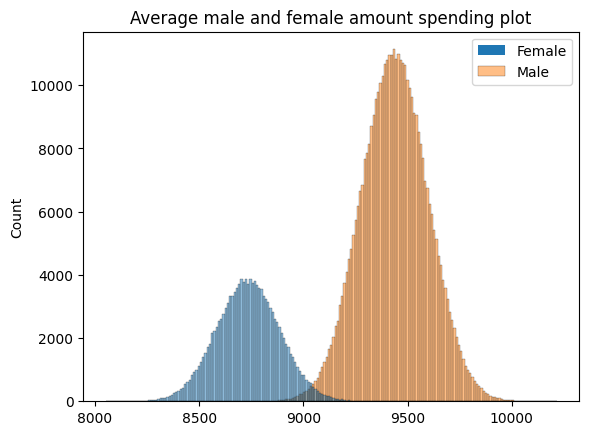

In [33]:
plt.title('Average male and female amount spending plot')
sns.histplot([female_amt_spending_means,male_amt_spending_means],legend=False)
plt.legend(['Female','Male'])
plt.show()

In [34]:
male_amt_means_twopointfifth = round(np.percentile(male_amt_spending_means,2.5),2)
male_amt_means_nintysevenpointfifth = round(np.percentile(male_amt_spending_means,97.5),2)
print(f'Confidence interval of male user purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

Confidence interval of male user purchase :[9123.99,9753.7]


In [35]:
female_amt_means_twopointfifth = round(np.percentile(female_amt_spending_means,2.5),2)
female_amt_means_nintysevenpointfifth = round(np.percentile(female_amt_spending_means,97.5),2)
print(f'Confidence interval of female user purchase :[{female_amt_means_twopointfifth},{female_amt_means_nintysevenpointfifth}]')

Confidence interval of female user purchase :[8439.97,9031.23]


# Checking for common amount both the user spending in purchase

In [36]:
common_interval_amount_spend_by_both_type_of_users = np.intersect1d(male_amt_spending_means,female_amt_spending_means)

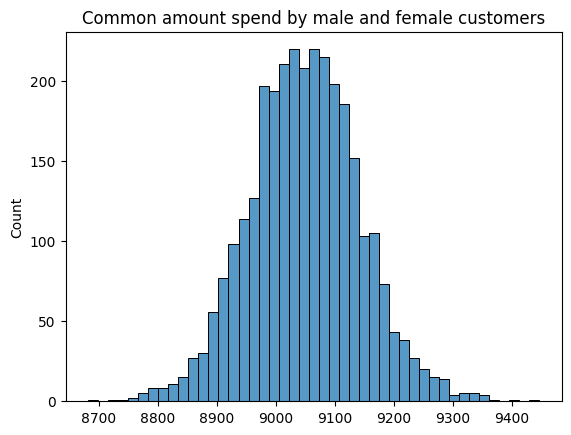

minimum amount : 8682.11, maximum amount : 9445.82


In [37]:
plt.title('Common amount spend by male and female customers')
sns.histplot(common_interval_amount_spend_by_both_type_of_users)
plt.show()
print(f'minimum amount : {min(common_interval_amount_spend_by_both_type_of_users)}, maximum amount : {max(common_interval_amount_spend_by_both_type_of_users)}')

# Observation
1. Above `Average male and female amount spending plot` depicts that although male or female customer are spending on purchase but there is a common amount set upto which both the set of users are spending.

2. This can be bring more benefits to bussiness by keeping product amount to that range it can bring more profit and it will attract more customers

3. As per `common amount spend plot` we can see both the set of customers can spend in between 8682.11 to 9445.82 amount.

# Married Users Spending Habits

In [38]:
df_married = data.loc[data['Marital_Status']==1]

In [40]:
df_married_purchase = df_married['Purchase']
print(f'Population size :{len(df_married_purchase)}')

Population size :225337


In [41]:
df_married_purchase_population_mean = round(df_married_purchase.mean(),2)
print(f'Married_customer_purchase_population_mean: {df_married_purchase_population_mean}')

Married_customer_purchase_population_mean: 9261.17


In [42]:
married_cust_amt_spending_means = get_sample_means(df_married_purchase,1000,225000)

100%|███████████████████████████████████████████████████████████████████████| 225000/225000 [00:11<00:00, 20135.65it/s]


In [43]:
married_cust_amt_spending_mean = married_cust_amt_spending_means.mean()
print(f'sample_mean: {round(married_cust_amt_spending_mean,2)}')

sample_mean: 9261.25


# Finding 95% confidence of purchase

In [44]:
married_cust_amt_spending_two_point_five,married_cust_amt_spending_ninty_seven_point_five = get_confidence_range(married_cust_amt_spending_means)
print(f'Confidence interval of married user purchase :[{married_cust_amt_spending_two_point_five}, {married_cust_amt_spending_ninty_seven_point_five}]')

Confidence interval of married user purchase :[8951.56, 9573.45]


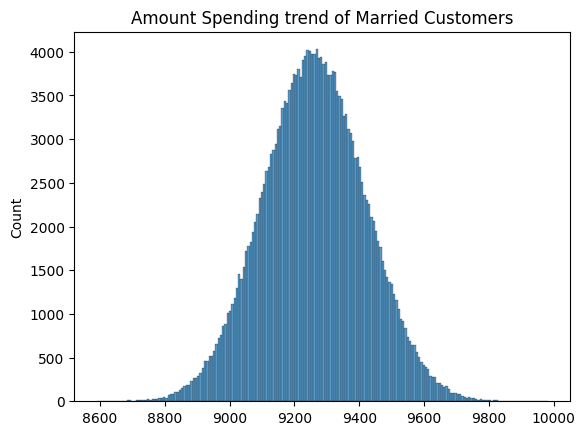

Confidence interval of married user purchase :[8951.56, 9573.45]


In [45]:
plt.title('Amount Spending trend of Married Customers')
sns.histplot(married_cust_amt_spending_means)
plt.show()
print(f'Confidence interval of married user purchase :[{married_cust_amt_spending_two_point_five}, {married_cust_amt_spending_ninty_seven_point_five}]')

# Unmarried Users Spending Habits

In [46]:
df_unmarried = data.loc[data['Marital_Status']==0]

In [47]:
df_unmarried['Age'].unique()

array(['0-17', '55+', '26-35', '51-55', '36-45', '18-25', '46-50'],
      dtype=object)

In [48]:
df_unmarried_purchase = df_unmarried['Purchase']
print(f'Population size :{len(df_unmarried_purchase)}')

Population size :324731


In [49]:
df_unmarried_purchase_population_mean = round(df_unmarried_purchase.mean(),2)
print(f'Unmarried_customer_purchase_population_mean: {df_unmarried_purchase_population_mean}')

Unmarried_customer_purchase_population_mean: 9265.91


In [50]:
unmarried_cust_amt_spending_means = get_sample_means(df_unmarried_purchase,1000,320000)

100%|███████████████████████████████████████████████████████████████████████| 320000/320000 [00:18<00:00, 17641.99it/s]


In [51]:
unmarried_cust_amt_spending_mean = unmarried_cust_amt_spending_means.mean()
print(f'sample_mean: {round(unmarried_cust_amt_spending_mean,2)}')

sample_mean: 9265.66


# Finding 95% confidence of purchase

In [52]:
unmarried_cust_amt_spending_two_point_five,unmarried_cust_amt_spending_ninty_seven_point_five = get_confidence_range(unmarried_cust_amt_spending_means)
print(f'Confidence interval of unmarried user purchase :[{unmarried_cust_amt_spending_two_point_five}, {unmarried_cust_amt_spending_ninty_seven_point_five}]')

Confidence interval of unmarried user purchase :[8954.67, 9577.9]


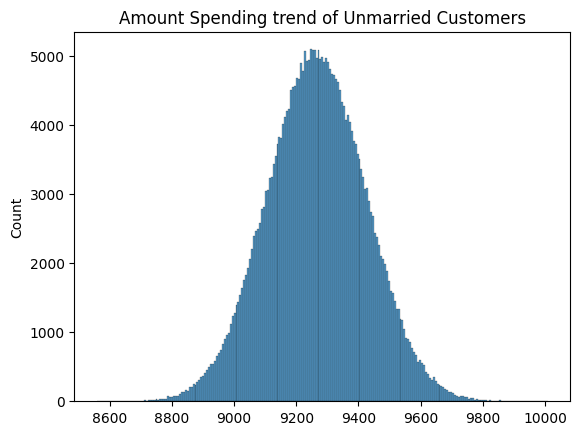

Confidence interval of unmarried user purchase :[8954.67, 9577.9]


In [53]:
plt.title('Amount Spending trend of Unmarried Customers')
sns.histplot(unmarried_cust_amt_spending_means)
plt.show()
print(f'Confidence interval of unmarried user purchase :[{unmarried_cust_amt_spending_two_point_five}, {unmarried_cust_amt_spending_ninty_seven_point_five}]')

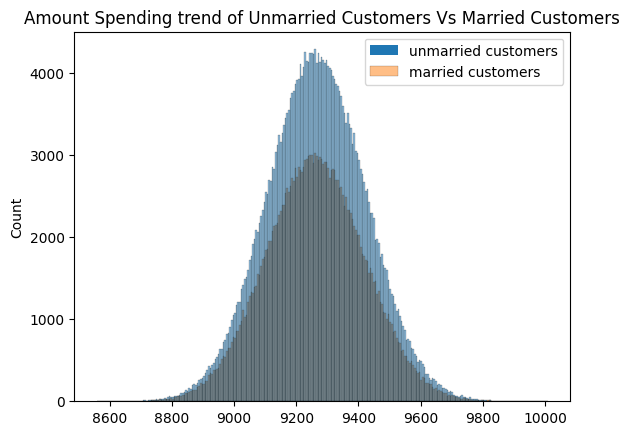

In [54]:
plt.title('Amount Spending trend of Unmarried Customers Vs Married Customers')
sns.histplot([unmarried_cust_amt_spending_means , married_cust_amt_spending_means ],legend=False)
plt.legend(['unmarried customers','married customers'])
plt.show()

# Observation
1. It is observed that unmarried customers are spending more than married customers.
2. Spending range of unmarried customers are in range of 8954.48 to 9578.36 amount.
3. Spending range of married customers are in range of 8953.21 to 9573.34 amount.
4. Important to notice that both category of customers are on an average spending around 9261.55 to 9265.31 amount in purchase

# Age wise Purchase Trend Analysis

In [55]:
married_population = data.loc[data['Marital_Status']==1]
unmarried_population = data.loc[data['Marital_Status']==0]

In [56]:
married_population['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+'], dtype=object)

# Married population binned by age group

In [103]:
def get_age_trend_analysis(means_list,sample_size,population_size,plot_title):
    print(f' population_mean :{round(means_list.mean(),2)}')
    means_list = get_sample_means(range_twentysix_to_thirtyfive,sample_size,population_size)
    print('sample_mean',round(means_list.mean(),2))
    first_interval,second_interval = get_confidence_range(means_list)
#     print(f'confidence range : [{first_interval},{second_interval}]')

    plt.title(plot_title)
    sns.histplot(means_list)
    plt.show()
    print(f'confidence range  : [{first_interval},{second_interval}]')
    print("-"*120)


In [104]:
range_fortysix_to_fifty = married_population.loc[married_population['Age']=='46-50']['Purchase']
print(f'population size of range_fortysix_to_fifty : {len(range_fortysix_to_fifty)}')
range_twentysix_to_thirtyfive= married_population.loc[married_population['Age']=='26-35']['Purchase']
print(f'population size of range_twentysix_to_thirtyfive : {len(range_twentysix_to_thirtyfive)}')
range_thirtysix_to_fortyfive = married_population.loc[married_population['Age']=='36-45']['Purchase']
print(f'population size of range_thirtysix_to_fortyfive : {len(range_thirtysix_to_fortyfive)}')
range_eighteen_to_twentyfive = married_population.loc[married_population['Age']=='18-25']['Purchase']
print(f'population size of range_eighteen_to_twentyfive : {len(range_eighteen_to_twentyfive)}')
range_fifityone_to_fiftyfive = married_population.loc[married_population['Age']=='51-55']['Purchase']
print(f'population size of range_fifityone_to_fiftyfive : {len(range_fifityone_to_fiftyfive)}')
range_fiftyplus = married_population.loc[married_population['Age']=='55+']['Purchase']
print(f'population size of range_fiftyplus : {len(range_fiftyplus)}')

population size of range_fortysix_to_fifty : 33011
population size of range_twentysix_to_thirtyfive : 86291
population size of range_thirtysix_to_fortyfive : 43636
population size of range_eighteen_to_twentyfive : 21116
population size of range_fifityone_to_fiftyfive : 27662
population size of range_fiftyplus : 13621


 population_mean :9305.54


100%|█████████████████████████████████████████████████████████████████████████| 33000/33000 [00:01<00:00, 24165.52it/s]


sample_mean 9253.91


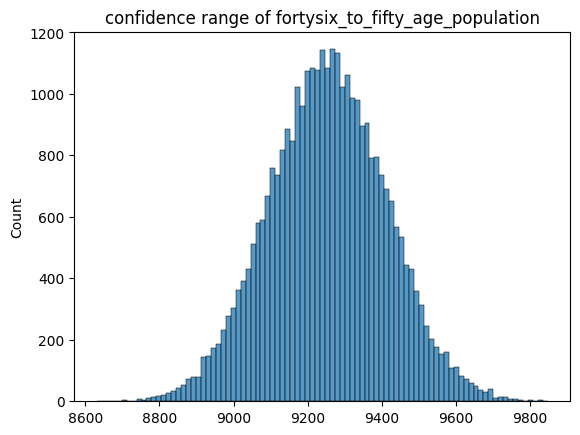

confidence range  : [8944.09,9565.79]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9252.88


100%|█████████████████████████████████████████████████████████████████████████| 86000/86000 [00:03<00:00, 24370.38it/s]


sample_mean 9252.58


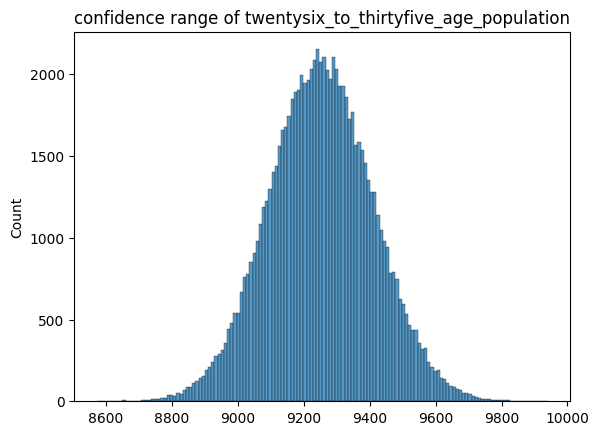

confidence range  : [8944.09,9565.7]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9223.1


100%|█████████████████████████████████████████████████████████████████████████| 43000/43000 [00:01<00:00, 24296.22it/s]


sample_mean 9251.81


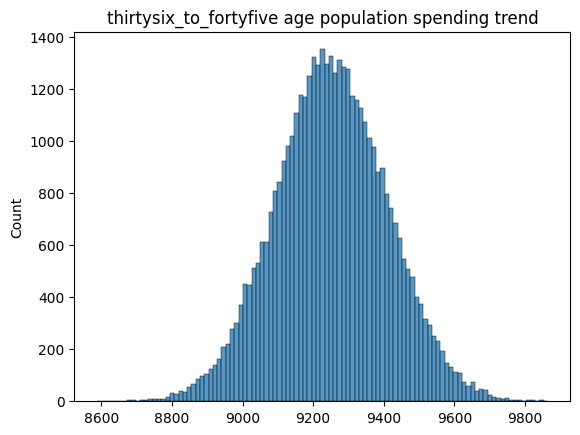

confidence range  : [8942.1,9563.64]
------------------------------------------------------------------------------------------------------------------------
 population_mean :8994.51


100%|█████████████████████████████████████████████████████████████████████████| 21000/21000 [00:00<00:00, 24227.91it/s]


sample_mean 9255.25


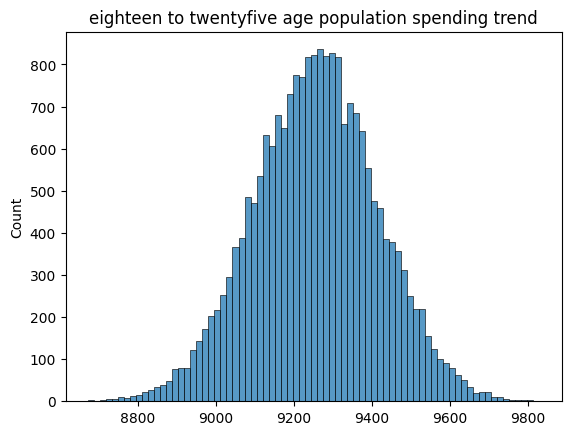

confidence range  : [8942.88,9566.19]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9518.74


100%|█████████████████████████████████████████████████████████████████████████| 27000/27000 [00:01<00:00, 24137.76it/s]


sample_mean 9252.71


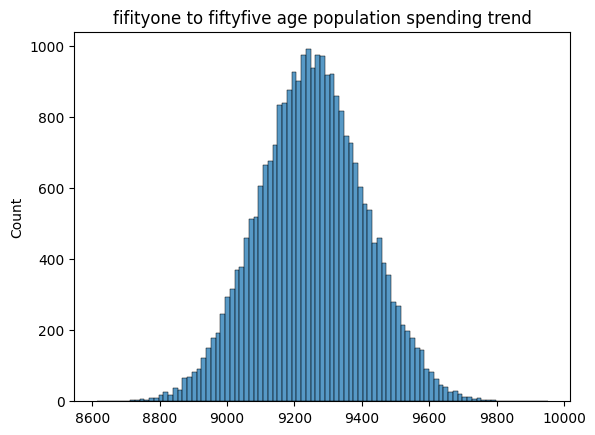

confidence range  : [8944.46,9565.35]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9218.51


100%|█████████████████████████████████████████████████████████████████████████| 13000/13000 [00:00<00:00, 23915.36it/s]


sample_mean 9253.55


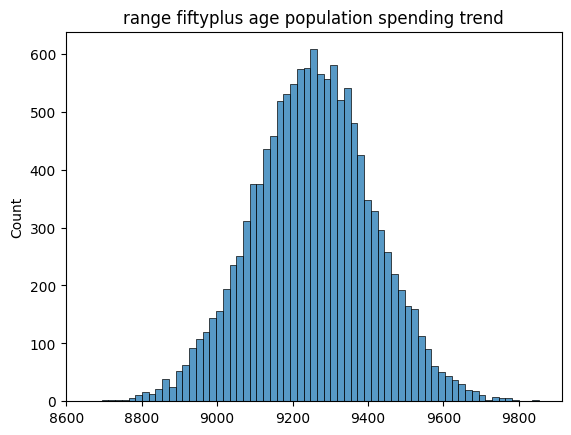

confidence range  : [8941.16,9563.29]
------------------------------------------------------------------------------------------------------------------------


In [105]:
get_age_trend_analysis(range_fortysix_to_fifty,1000,33000,'confidence range of fortysix_to_fifty_age_population')
get_age_trend_analysis(range_twentysix_to_thirtyfive,1000,86000,'confidence range of twentysix_to_thirtyfive_age_population')
get_age_trend_analysis(range_thirtysix_to_fortyfive,1000,43000,'thirtysix_to_fortyfive age population spending trend')
get_age_trend_analysis(range_eighteen_to_twentyfive,1000,21000,'eighteen to twentyfive age population spending trend')
get_age_trend_analysis(range_fifityone_to_fiftyfive,1000,27000,'fifityone to fiftyfive age population spending trend')
get_age_trend_analysis(range_fiftyplus,1000,13000,'range fiftyplus age population spending trend')

# Unmarried population binned by age group

In [109]:
range_zero_to_seventeen = unmarried_population.loc[unmarried_population['Age']=='0-17']['Purchase']
range_fiftyfiveplus = unmarried_population.loc[unmarried_population['Age']=='55+']['Purchase']
range_twentysix_to_thirtyfive = unmarried_population.loc[unmarried_population['Age']=='26-35']['Purchase']
range_fiftyone_to_fiftyfive = unmarried_population.loc[unmarried_population['Age']=='51-55']['Purchase']
range_thirtysix_to_fortyfive = unmarried_population.loc[unmarried_population['Age']=='36-45']['Purchase']
range_eighteen_to_twentyfive = unmarried_population.loc[unmarried_population['Age']=='18-25']['Purchase']
range_fortysix_to_fifty = unmarried_population.loc[unmarried_population['Age']=='46-50']['Purchase']

In [113]:
print(f'population size range_zero_to_seventeen : {len(range_zero_to_seventeen)}')
print(f'population size range_fiftyfiveplus : {len(range_fiftyfiveplus)}')
print(f'population size range_twentysix_to_thirtyfive : {len(range_twentysix_to_thirtyfive)}')
print(f'population size range_fiftyone_to_fiftyfive : {len(range_fiftyone_to_fiftyfive)}')
print(f'population size range_thirtysix_to_fortyfive : {len(range_thirtysix_to_fortyfive)}')
print(f'population size range_eighteen_to_twentyfive : {len(range_eighteen_to_twentyfive)}')
print(f'population size range_fortysix_to_fifty : {len(range_fortysix_to_fifty)}')

population size range_zero_to_seventeen : 15102
population size range_fiftyfiveplus : 7883
population size range_twentysix_to_thirtyfive : 133296
population size range_fiftyone_to_fiftyfive : 10839
population size range_thirtysix_to_fortyfive : 66377
population size range_eighteen_to_twentyfive : 78544
population size range_fortysix_to_fifty : 12690


 population_mean :8933.46


100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 21903.02it/s]


sample_mean 9251.79


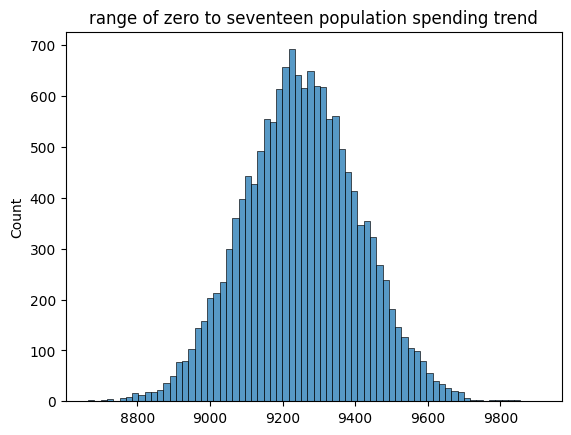

confidence range  : [8944.86,9565.71]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9539.77


100%|███████████████████████████████████████████████████████████████████████████| 7800/7800 [00:00<00:00, 20458.70it/s]


sample_mean 9254.23


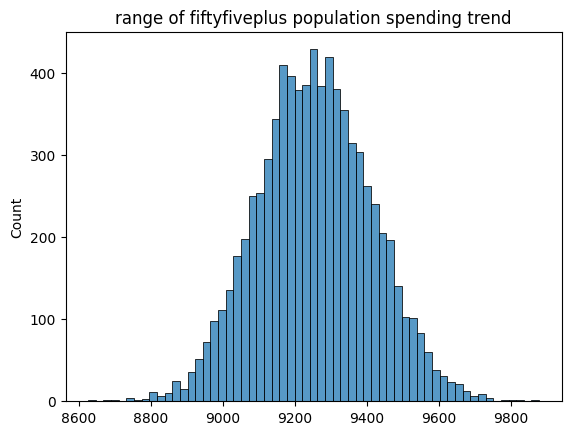

confidence range  : [8952.94,9564.65]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9252.57


100%|███████████████████████████████████████████████████████████████████████| 133000/133000 [00:06<00:00, 21513.24it/s]


sample_mean 9252.87


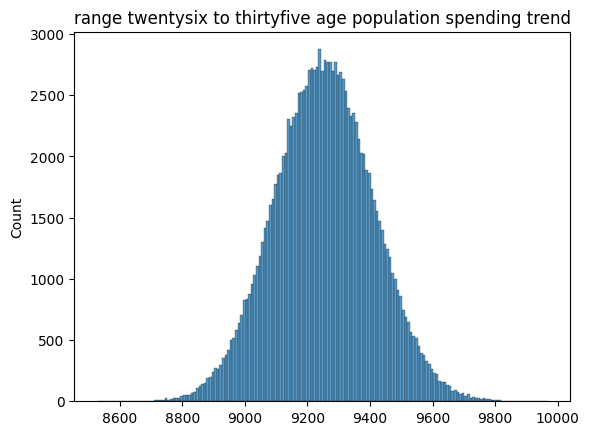

confidence range  : [8944.17,9565.69]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9575.83


100%|█████████████████████████████████████████████████████████████████████████| 10800/10800 [00:00<00:00, 21125.62it/s]


sample_mean 9253.99


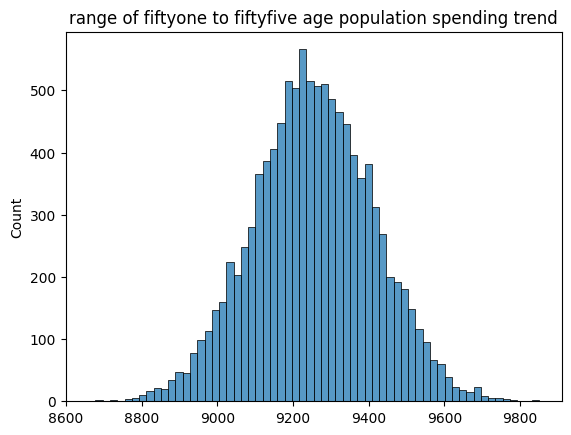

confidence range  : [8942.35,9562.09]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9402.52


100%|█████████████████████████████████████████████████████████████████████████| 66300/66300 [00:03<00:00, 21450.13it/s]


sample_mean 9252.63


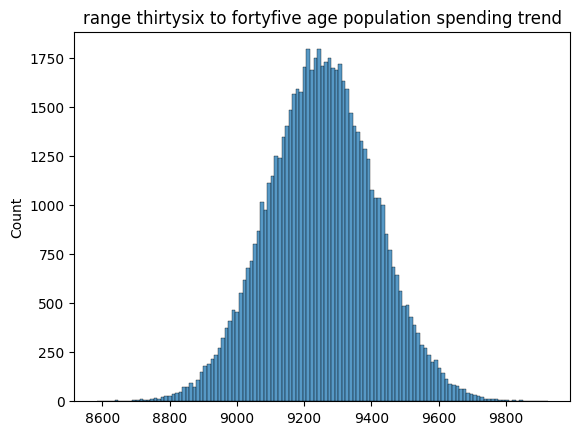

confidence range  : [8942.15,9566.9]
------------------------------------------------------------------------------------------------------------------------
 population_mean :9216.75


100%|█████████████████████████████████████████████████████████████████████████| 78500/78500 [00:03<00:00, 21442.35it/s]


sample_mean 9252.81


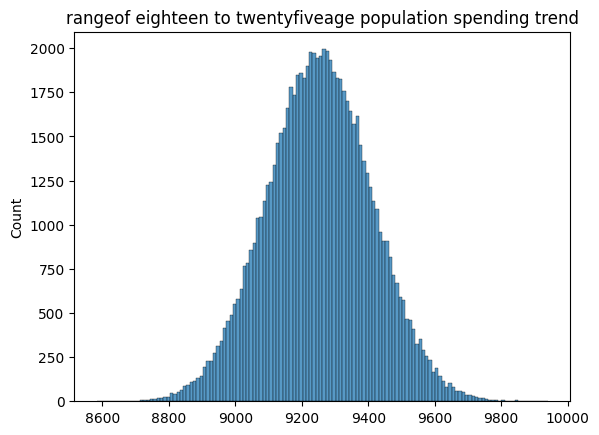

confidence range  : [8942.97,9564.06]
------------------------------------------------------------------------------------------------------------------------
 population_mean :8956.53


100%|█████████████████████████████████████████████████████████████████████████| 12600/12600 [00:00<00:00, 21379.83it/s]


sample_mean 9252.82


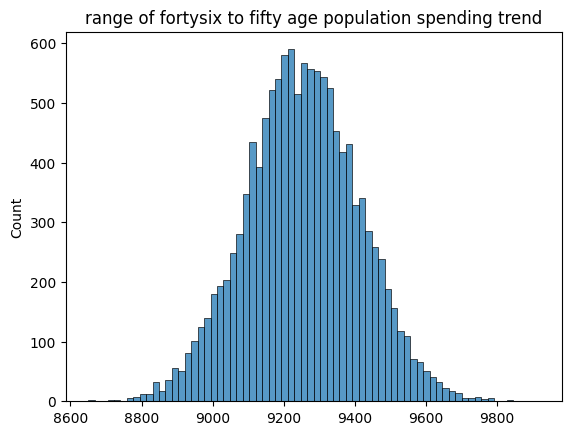

confidence range  : [8939.78,9564.54]
------------------------------------------------------------------------------------------------------------------------


In [114]:
get_age_trend_analysis(range_zero_to_seventeen,1000,15000,'range of zero to seventeen population spending trend')
get_age_trend_analysis(range_fiftyfiveplus,1000,7800,'range of fiftyfiveplus population spending trend')
get_age_trend_analysis(range_twentysix_to_thirtyfive,1000,133000,'range twentysix to thirtyfive age population spending trend')
get_age_trend_analysis(range_fiftyone_to_fiftyfive,1000,10800,'range of fiftyone to fiftyfive age population spending trend')
get_age_trend_analysis(range_thirtysix_to_fortyfive,1000,66300,'range thirtysix to fortyfive age population spending trend')
get_age_trend_analysis(range_eighteen_to_twentyfive,1000,78500,'rangeof eighteen to twentyfiveage population spending trend')
get_age_trend_analysis(range_fortysix_to_fifty,1000,12600,'range of fortysix to fifty age population spending trend')